## Problem Description

So I have dataset parameters (different concentrations of ions? 1000 rows and 7 columns).
By using changing these parameters I get the voltage change that is in the shape of 1000 X 3201.
I want to apply pls regression using python. Like parameters will be X and voltages will be Y. Make all the necessary plots validate your results and complete documentation of the process.

I need two models in the first model parameters is X and the membrane potential is Y. In the second model X is the membrane potentials and Y is the parameters.

## Background


While OLS regression is a very popular method, it becomes unworkable when $X^TX$ is a singular matrix and its inverse doesn’t exist. This happens when the number of predictors, d, is more than the number of observations, N. The OLS regression approach also becomes unworkable when the predictors are highly correlated resulting in the columns of X matrix being not linearly independent. In such cases, the regression coefficients are unreliable. This situation is known as multicollinearity.[1] 

One potential solution for multicollinearity and fewer observations is to make use of principal component analysis to create a smaller, uncorrelated set of new features and then use them to perform regression. This approach is known as PCA regression (PCR). A drawback of using PCA is that it is meant for preserving the matrix X of predictors measurements. Thus the selected principal components may not be much relevant for predicting the response variables. A better option is to look for those components of X that are more relevant for Y. This is what is done by the method known as the partial least squares (PLS).[1] 

## PLS Regression

In PCA, we decompose $X^{T}X$ to determine principal components. In other words, we are working with covariance of the predictors. In PLS, we work with cross covariance by working with $ X^{T} Y$ to simultaneously decompose X and Y to find components that can explain X as well as Y. The $N\times d  X$ matrix is decomposed/approximated as $ X = T P^T$ with $ T^T T =  I$, I being an identity matrix. The number of columns in  T matrix, known as the X–score matrix, determines the number of extracted components; these components are called latent vectors and serve the same purpose as that of eigenvectors in PCA.  Their number determines the accuracy of the resulting regression model. The matrix P is known as the X–loading matrix. Instead of regressing Y on X, it is regressed on T and is approximated as $ Y =  T Q^T$. The matrix Q is called the Y-weights matrix. The steps to determine T, P, and Q are described below using an example. Once these matrices are determined, regression coefficients to predict Y from X are determined.[1]

PLS is based on finding a similar linear transformation, but accomplishes the same task by maximising the covariance between Y and X’. In other words, PLS takes into account both spectra and response values and in doing so will improve on some of the limitations on PCR. [2]


## Notes:

In PCA, how do we know how many components to use? The general advice is to choose the first n principal components that account for the large majority of the variance, typically 95% or 90% (or even 85%) depending on the problem.

Scale the features to have zero mean and standard deviation of 1. This is important when correlating data with very different variances. Staple of PCA. Done using:
nfeat1 = StandardScaler().fit_transform(feat)
nfeat2 = StandardScaler().fit_transform(dfeat)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/PLS Regression')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# ! unzip Membrane_Potential_with_Time_Stamp.zip

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
X = pd.read_csv('data_with_parameters.csv', index_col=0)
X

,g_pas,decay_CaDynamics_E2,gamma_CaDynamics_E2,gCa_LVAstbar_Ca_LVAst,gCa_HVAbar_Ca_HVA,gSKv3_1bar_SKv3_1,gSK_E2bar_SK_E2,gK_Tstbar_K_Tst,gK_Pstbar_K_Pst,gNap_Et2bar_Nap_Et2,gNaTa_tbar_NaTa_t
0,0.000035,149.85,0.045669,0.000775,0.000706,0.769,0.06905,0.06975,0.0075,0.005145,1.594
1,0.000033,767.25,0.036363,0.007385,0.000317,0.335,0.00705,0.04305,0.1815,0.006315,0.138
2,0.000046,90.07,0.046659,0.000745,0.000528,1.897,0.02705,0.04685,0.8505,0.008485,2.246
3,0.000047,828.01,0.025671,0.002225,0.000621,0.211,0.05555,0.00855,0.0955,0.007955,1.870
4,0.000038,230.21,0.018444,0.005445,0.000536,0.677,0.00175,0.02405,0.0235,0.009665,2.538
...,...,...,...,...,...,...,...,...,...,...,...
995,0.000030,577.13,0.031908,0.006365,0.000562,0.317,0.00505,0.09485,0.5935,0.004705,1.922
996,0.000027,173.37,0.014286,0.004875,0.000396,1.611,0.02135,0.01595,0.0765,0.009775,1.342
997,0.000044,516.37,0.016167,0.006825,0.000760,0.187,0.03015,0.04495,0.5425,0.004115,1.654
998,0.000024,266.47,0.006069,0.004505,0.000853,0.633,0.02955,0.00705,0.8715,0.007195,0.478


In [7]:
y = pd.read_csv('Membrane_Potential_with_Time_Stamp.csv')
y

,0.0,0.062,0.125,0.188,0.25,0.312,0.375,0.438,0.5,0.562,...,199.438,199.5,199.562,199.625,199.688,199.75,199.812,199.875,199.938,200.0
0,-77.348943,-77.348925,-77.348907,-77.348889,-77.348871,-77.348853,-77.348836,-77.348818,-77.348801,-77.348784,...,-82.721225,-82.721111,-82.720996,-82.720881,-82.720766,-82.720651,-82.720537,-82.720422,-82.720307,-82.720193
1,-77.576018,-77.575977,-77.575935,-77.575894,-77.575853,-77.575812,-77.575771,-77.575730,-77.575690,-77.575649,...,-84.772042,-84.772024,-84.772007,-84.771989,-84.771972,-84.771954,-84.771936,-84.771919,-84.771901,-84.771883
2,-78.047719,-78.047594,-78.047469,-78.047344,-78.047219,-78.047095,-78.046970,-78.046846,-78.046721,-78.046597,...,-84.802083,-84.802079,-84.802075,-84.802071,-84.802067,-84.802063,-84.802059,-84.802055,-84.802051,-84.802048
3,-77.606813,-77.606788,-77.606763,-77.606739,-77.606714,-77.606690,-77.606665,-77.606641,-77.606617,-77.606592,...,-84.002373,-84.002173,-84.001973,-84.001773,-84.001573,-84.001373,-84.001173,-84.000973,-84.000772,-84.000572
4,-77.786328,-77.786252,-77.786176,-77.786100,-77.786025,-77.785949,-77.785873,-77.785798,-77.785722,-77.785647,...,-84.754283,-84.754278,-84.754273,-84.754267,-84.754262,-84.754257,-84.754251,-84.754246,-84.754241,-84.754235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-77.443767,-77.443742,-77.443716,-77.443691,-77.443666,-77.443641,-77.443616,-77.443591,-77.443567,-77.443542,...,-84.137688,-84.137653,-84.137619,-84.137585,-84.137550,-84.137516,-84.137482,-84.137447,-84.137413,-84.137379
996,-77.905130,-77.905043,-77.904956,-77.904869,-77.904782,-77.904696,-77.904609,-77.904522,-77.904436,-77.904350,...,-84.730930,-84.730923,-84.730916,-84.730909,-84.730901,-84.730894,-84.730887,-84.730880,-84.730873,-84.730866
997,-77.136727,-77.136707,-77.136686,-77.136666,-77.136646,-77.136626,-77.136606,-77.136586,-77.136566,-77.136547,...,-83.537046,-83.536567,-83.536087,-83.535607,-83.535127,-83.534647,-83.534166,-83.533685,-83.533203,-83.532721
998,-77.420903,-77.420880,-77.420857,-77.420834,-77.420811,-77.420788,-77.420765,-77.420742,-77.420719,-77.420697,...,-84.117300,-84.117169,-84.117039,-84.116908,-84.116778,-84.116647,-84.116516,-84.116386,-84.116255,-84.116124


In [8]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

# Data after standardization
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,0.025981,-1.273058,1.428943,-1.463584,0.715337,-0.400104,0.659912,0.684160,-1.706071,0.050229,-0.351606
1,-0.219971,0.909327,0.777691,0.826189,-0.632199,-1.151814,-1.487832,-0.240755,-1.103317,0.455530,-1.612540
2,1.290378,-1.484368,1.498225,-1.473976,0.098727,1.553650,-0.795012,-0.109119,1.214168,1.207240,0.213042
3,1.422014,1.124102,0.029445,-0.961289,0.417424,-1.366589,0.192258,-1.435871,-1.401230,1.023643,-0.112583
4,0.320430,-0.989002,-0.476314,0.154153,0.126440,-0.559453,-1.671430,-0.898935,-1.650645,1.616004,0.465922
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.614878,0.237291,0.465922,0.472850,0.213042,-1.182991,-1.557114,1.553650,0.323894,-0.102191,-0.067550
996,-0.902399,-1.189919,-0.767299,-0.043301,-0.361999,1.058284,-0.992466,-1.179527,-1.467048,1.654109,-0.569845
997,1.092925,0.022517,-0.635663,0.632199,0.902399,-1.408158,-0.687625,-0.174937,0.147224,-0.306573,-0.299645
998,-1.234953,-0.860830,-1.342340,-0.171473,1.224561,-0.635663,-0.708409,-1.487832,1.286914,0.760371,-1.318091


In [ ]:
n_comp = 2

# Define PLS object
pls = PLSRegression(n_components=n_comp)

# Cross-validation
y_cv = cross_val_predict(pls, X, y, cv=10)

# Calculate scores
r2 = r2_score(y, y_cv)
mse = mean_squared_error(y, y_cv)
rpd = y.std()/np.sqrt(mse)

In [ ]:
print(f'r2: {r2}')
print(f'mse: {mse}')
print(f'rpd: {rpd}')

r2: -0.016317527607014295
mse: 59.02935645866401
rpd: 0.0        0.092492
0.062      0.092484
0.125      0.092475
0.188      0.092466
0.25       0.092457
             ...   
199.75     0.893576
199.812    0.893583
199.875    0.893589
199.938    0.893596
200.0      0.893603
Length: 3201, dtype: float64


In [ ]:
def optimise_pls_cv(X, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

In [ ]:
# test with 11 components, since only 11 variables in dataset
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 11)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

In [ ]:
# Plot the mses
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

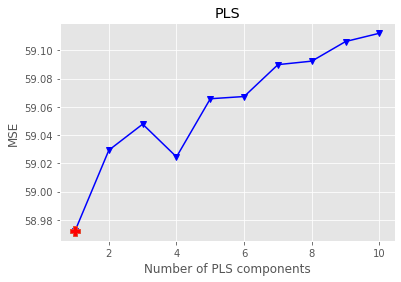

In [ ]:
plot_metrics(mses, 'MSE', 'min')

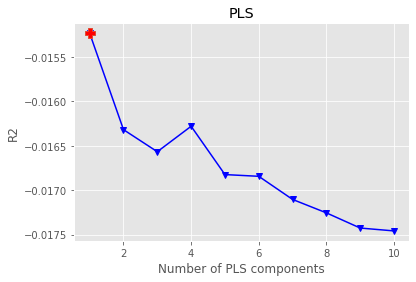

In [ ]:
plot_metrics(r2s, 'R2', 'max')

The maximum R square and the minimum MSE value is for PLS component 1.

In [ ]:
# Metrics indicate that one PLS component gives best solution
y_cv, r2, mse, rpd = optimise_pls_cv(X, y, 1)

In [ ]:
print('R2: %0.4f, MSE: %0.4f' %(r2, mse))

R2: -0.0152, MSE: 58.9722


### Variable Selection

In [13]:
def simple_pls_cv(X, y, n_comp):
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_c = pls.predict(X)
    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)    
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
    

In the function below after fitting a PLS regression model what we have done is to extract the sequence of indices corresponding to sorting the absolute value of the PLS regression coefficients in ascending order, and use that sequence to sort the spectra accordingly. Note that sorting the spectral component according to the strength of the associated PLS coefficients has no influence whatsoever on the PLS regression, but it enables us to easily discard one component at a time.

This function works by running a PLS regression with a given number of components (up to a specified maximum), then filtering out one regression coefficient at a time up to the maximum number allowed. All data are stored in the 2D array mse. At the end of the double loop we search for the global minimum of mse excluding the zeros. That will give us the number of components and the parameter values that correspond to the optimal cross-validation MSE.

In [14]:
def pls_variable_selection(X, y, max_comp):
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp,X.shape[1]))
    # Loop over the number of PLS components
    for i in range(max_comp):
        
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y)
        
        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))
        # Sort spectra accordingly 
        Xc = X[:,sorted_ind]
        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=5)
            mse[i,j] = mean_squared_error(y, y_cv)
    
        comp = 100*(i+1)/(max_comp)
#        stdout.write("\r%d%% completed" % comp)
#        stdout.flush()
#    stdout.write("\n")
    # # Calculate and print the position of minimum in MSE
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Values to be discarded ",mseminy[0])
    print('Optimised MSEP ', mse[mseminx,mseminy][0])
#    stdout.write("\n")

    # Calculate PLS with optimal components and export values
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y)
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
    Xc = X[:,sorted_ind]
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

In [ ]:
simple_pls_cv(X,y,1)

R2 calib: 0.009
R2 CV: -0.015
MSE calib: 57.687
MSE CV: 58.972


In [ ]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X, y, 1)
simple_pls_cv(opt_Xc, y, ncomp)

Optimised number of PLS components:  1
Values to be discarded  6
Optimised MSEP  58.67971460905785
R2 calib: 0.009
R2 CV: -0.006
MSE calib: 57.702
MSE CV: 58.519


We can see that we are getting similar MSE and $R^2$ after variable selection. 

---

So essentially our model with 1 component is the best model.

# Second Regression Model

In [9]:
X = pd.read_csv('Membrane_Potential_with_Time_Stamp.csv')
X

,0.0,0.062,0.125,0.188,0.25,0.312,0.375,0.438,0.5,0.562,...,199.438,199.5,199.562,199.625,199.688,199.75,199.812,199.875,199.938,200.0
0,-77.348943,-77.348925,-77.348907,-77.348889,-77.348871,-77.348853,-77.348836,-77.348818,-77.348801,-77.348784,...,-82.721225,-82.721111,-82.720996,-82.720881,-82.720766,-82.720651,-82.720537,-82.720422,-82.720307,-82.720193
1,-77.576018,-77.575977,-77.575935,-77.575894,-77.575853,-77.575812,-77.575771,-77.575730,-77.575690,-77.575649,...,-84.772042,-84.772024,-84.772007,-84.771989,-84.771972,-84.771954,-84.771936,-84.771919,-84.771901,-84.771883
2,-78.047719,-78.047594,-78.047469,-78.047344,-78.047219,-78.047095,-78.046970,-78.046846,-78.046721,-78.046597,...,-84.802083,-84.802079,-84.802075,-84.802071,-84.802067,-84.802063,-84.802059,-84.802055,-84.802051,-84.802048
3,-77.606813,-77.606788,-77.606763,-77.606739,-77.606714,-77.606690,-77.606665,-77.606641,-77.606617,-77.606592,...,-84.002373,-84.002173,-84.001973,-84.001773,-84.001573,-84.001373,-84.001173,-84.000973,-84.000772,-84.000572
4,-77.786328,-77.786252,-77.786176,-77.786100,-77.786025,-77.785949,-77.785873,-77.785798,-77.785722,-77.785647,...,-84.754283,-84.754278,-84.754273,-84.754267,-84.754262,-84.754257,-84.754251,-84.754246,-84.754241,-84.754235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-77.443767,-77.443742,-77.443716,-77.443691,-77.443666,-77.443641,-77.443616,-77.443591,-77.443567,-77.443542,...,-84.137688,-84.137653,-84.137619,-84.137585,-84.137550,-84.137516,-84.137482,-84.137447,-84.137413,-84.137379
996,-77.905130,-77.905043,-77.904956,-77.904869,-77.904782,-77.904696,-77.904609,-77.904522,-77.904436,-77.904350,...,-84.730930,-84.730923,-84.730916,-84.730909,-84.730901,-84.730894,-84.730887,-84.730880,-84.730873,-84.730866
997,-77.136727,-77.136707,-77.136686,-77.136666,-77.136646,-77.136626,-77.136606,-77.136586,-77.136566,-77.136547,...,-83.537046,-83.536567,-83.536087,-83.535607,-83.535127,-83.534647,-83.534166,-83.533685,-83.533203,-83.532721
998,-77.420903,-77.420880,-77.420857,-77.420834,-77.420811,-77.420788,-77.420765,-77.420742,-77.420719,-77.420697,...,-84.117300,-84.117169,-84.117039,-84.116908,-84.116778,-84.116647,-84.116516,-84.116386,-84.116255,-84.116124


In [10]:
X = StandardScaler().fit_transform(X)

# Data after standardization
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200
0,0.478936,0.478921,0.478906,0.478891,0.478876,0.478860,0.478845,0.478830,0.478815,0.478800,...,-0.042713,-0.042738,-0.042763,-0.042788,-0.042812,-0.042837,-0.042862,-0.042887,-0.042912,-0.042937
1,0.159232,0.159220,0.159207,0.159195,0.159182,0.159170,0.159157,0.159145,0.159132,0.159119,...,-0.341591,-0.341628,-0.341665,-0.341702,-0.341739,-0.341776,-0.341812,-0.341849,-0.341886,-0.341923
2,-0.504884,-0.504842,-0.504799,-0.504757,-0.504715,-0.504672,-0.504630,-0.504588,-0.504546,-0.504503,...,-0.345969,-0.346008,-0.346047,-0.346086,-0.346125,-0.346164,-0.346202,-0.346241,-0.346280,-0.346319
3,0.115876,0.115836,0.115796,0.115756,0.115716,0.115676,0.115636,0.115596,0.115556,0.115516,...,-0.229423,-0.229434,-0.229445,-0.229456,-0.229467,-0.229478,-0.229489,-0.229500,-0.229511,-0.229522
4,-0.136868,-0.136859,-0.136851,-0.136843,-0.136834,-0.136826,-0.136818,-0.136809,-0.136801,-0.136793,...,-0.339003,-0.339042,-0.339081,-0.339119,-0.339158,-0.339197,-0.339235,-0.339274,-0.339313,-0.339351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.345431,0.345414,0.345396,0.345379,0.345361,0.345344,0.345326,0.345309,0.345292,0.345274,...,-0.249143,-0.249178,-0.249213,-0.249248,-0.249283,-0.249318,-0.249354,-0.249389,-0.249424,-0.249459
996,-0.304131,-0.304123,-0.304115,-0.304107,-0.304099,-0.304091,-0.304083,-0.304075,-0.304068,-0.304060,...,-0.335600,-0.335638,-0.335677,-0.335715,-0.335754,-0.335792,-0.335830,-0.335869,-0.335907,-0.335946
997,0.777718,0.777734,0.777751,0.777768,0.777784,0.777801,0.777818,0.777834,0.777851,0.777868,...,-0.161607,-0.161578,-0.161549,-0.161520,-0.161491,-0.161462,-0.161432,-0.161403,-0.161374,-0.161344
998,0.377621,0.377604,0.377587,0.377569,0.377552,0.377535,0.377517,0.377500,0.377483,0.377466,...,-0.246171,-0.246193,-0.246214,-0.246235,-0.246256,-0.246277,-0.246298,-0.246319,-0.246340,-0.246361


In [11]:
y = pd.read_csv('data_with_parameters.csv', index_col=0)

In [ ]:
# test with 40 components
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 40)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

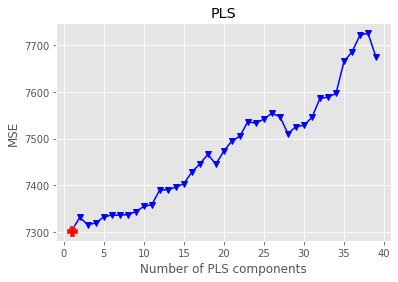

In [ ]:
plot_metrics(mses, 'MSE', 'min')

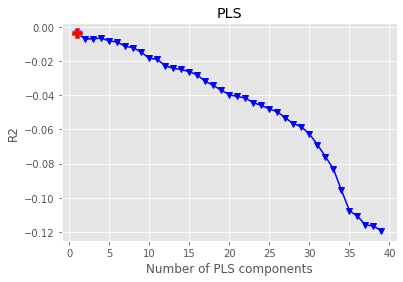

In [ ]:
plot_metrics(r2s, 'R2', 'max')

The maximum R square and the minimum MSE value is for PLS component 1.

In [ ]:
# Metrics indicate that one PLS component gives best solution
y_cv, r2, mse, rpd = optimise_pls_cv(X, y, 1)

In [ ]:
print('R2: %0.4f, MSE: %0.4f' %(r2, mse))

R2: -0.0037, MSE: 7301.6071


### Variable Selection

In [ ]:
simple_pls_cv(X,y,11)

R2 calib: 0.001
R2 CV: -0.004
MSE calib: 7267.848
MSE CV: 7301.607


In [ ]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X, y, 11)
simple_pls_cv(opt_Xc, y, ncomp)

Optimised number of PLS components:  1
Values to be discarded  203
Optimised MSEP  7271.178181811414
R2 calib: 0.001
R2 CV: -0.004
MSE calib: 7267.994
MSE CV: 7301.460


In this case as well we are getting same results before and after variable selection. 

Hence our model with 1 component in this case is the best model.

### Trying with varying number of components

In [15]:
simple_pls_cv(X,y,100)

R2 calib: 0.099
R2 CV: -31.756
MSE calib: 6629.806
MSE CV: 149226.625


In [18]:
simple_pls_cv(X,y,200)

R2 calib: 0.203
R2 CV: -26983565895.258
MSE calib: 5874.446
MSE CV: 53581775768666.523


In [16]:
simple_pls_cv(X,y,500)

C:\Users\bilal.hoda\Anaconda\lib\site-packages\sklearn\cross_decomposition\_pls.py:351: UserWarning: X scores are null at iteration 248
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\bilal.hoda\Anaconda\lib\site-packages\sklearn\cross_decomposition\_pls.py:351: UserWarning: X scores are null at iteration 243
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\bilal.hoda\Anaconda\lib\site-packages\sklearn\cross_decomposition\_pls.py:351: UserWarning: X scores are null at iteration 240
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\bilal.hoda\Anaconda\lib\site-packages\sklearn\cross_decomposition\_pls.py:351: UserWarning: X scores are null at iteration 244
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\bilal.hoda\Anaconda\lib\site-packages\sklearn\cross_decomposition\_pls.py:351: UserWarning: X scores are null at iteration 239
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\bilal.hoda\Anaconda\lib\si

R2 calib: 0.242
R2 CV: -4146975637337.542
MSE calib: 5580.193
MSE CV: 40963697224164952.000


In [17]:
simple_pls_cv(X,y,1000)

C:\Users\bilal.hoda\Anaconda\lib\site-packages\sklearn\cross_decomposition\_pls.py:351: UserWarning: X scores are null at iteration 248
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\bilal.hoda\Anaconda\lib\site-packages\sklearn\cross_decomposition\_pls.py:351: UserWarning: X scores are null at iteration 243
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\bilal.hoda\Anaconda\lib\site-packages\sklearn\cross_decomposition\_pls.py:351: UserWarning: X scores are null at iteration 240
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\bilal.hoda\Anaconda\lib\site-packages\sklearn\cross_decomposition\_pls.py:351: UserWarning: X scores are null at iteration 244
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\bilal.hoda\Anaconda\lib\site-packages\sklearn\cross_decomposition\_pls.py:351: UserWarning: X scores are null at iteration 239
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\bilal.hoda\Anaconda\lib\si

R2 calib: 0.242
R2 CV: -4146975637337.448
MSE calib: 5580.193
MSE CV: 40963697224165360.000


### References:

[1] https://iksinc.online/tag/partial-least-squares/

[2] https://nirpyresearch.com/partial-least-squares-regression-python/

[3] https://nirpyresearch.com/variable-selection-method-pls-python/